# 📌 Project: Sentiment Analysis and Word Cloud Creation from Comments

This project performs sentiment analysis on a dataset of user comments and visualizes the results by generating a word cloud. The main tasks include determining the sentiment of each comment (positive, negative, or neutral), vectorizing the comments, and visualizing frequent words in the form of a word cloud.

**Key libraries used:**

- **Pandas**: For data manipulation
- **TextBlob**: For sentiment analysis
- **TfidfVectorizer (sklearn)**: For text vectorization
- **Matplotlib and WordCloud**: For visualization


# 🔍 Importing Necessary Libraries
```python
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
```
### 📌 Explanation:
The required libraries are imported into the project.

- **pandas**: For reading and processing the CSV file.
- **textblob**: For performing sentiment analysis on each comment.
- **TfidfVectorizer**: For converting text data into numerical vectors.
- **matplotlib.pyplot**: For creating visual plots.
- **WordCloud**: For generating a word cloud from the comments.


In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 🗂 Reading the CSV File
```python
df = pd.read_csv('/content/sentiment-analysis.csv')
df
```
### 📌 Explanation:
The file 'sentiment-analysis.csv' is read and stored as a DataFrame `df`.

The `df` object contains the dataset with user comments. The contents of `df` are displayed to inspect the data (usually within a Jupyter notebook).



In [ ]:
df=pd.read_csv('/content/sentiment-analysis.csv')
df

,Comment
0,"Amazing service, very satisfied with the purch..."
1,"Terrible experience, I want a refund."
2,"It was okay, nothing special really."
3,Fantastic quality and quick shipping!
4,"Not what I expected, kind of disappointing."
5,"Really impressed, will buy again for sure!"
6,"Poor packaging, item arrived damaged."
7,"Everything went smoothly, happy with the result."
8,"Could be better, but it works for now."
9,Worst product I’ve ever bought.


# 📊 **Sentiment Score Calculation**

```python
df['duygu'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
```

### 📌 **Explanation:**

- For each comment in the `Comment` column, sentiment analysis is performed using **TextBlob**.
- The `.sentiment.polarity` method returns a sentiment score between **-1** (negative) and **+1** (positive).

**For example:**

- `"I love this product"` → **+0.8**
- `"It was a terrible experience"` → **-0.9**
- `"It’s okay"` → **0.0**



In [ ]:
df['duygu'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['duygu'].apply(lambda x: 'Pozitif' if x > 0 else ('Negatif' if x < 0 else 'Nötr'))
df

,Comment,duygu,sentiment
0,"Amazing service, very satisfied with the purch...",0.625000,Pozitif
1,"Terrible experience, I want a refund.",-1.000000,Negatif
2,"It was okay, nothing special really.",0.352381,Pozitif
3,Fantastic quality and quick shipping!,0.408333,Pozitif
4,"Not what I expected, kind of disappointing.",-0.033333,Negatif
5,"Really impressed, will buy again for sure!",0.812500,Pozitif
6,"Poor packaging, item arrived damaged.",-0.400000,Negatif
7,"Everything went smoothly, happy with the result.",0.800000,Pozitif
8,"Could be better, but it works for now.",0.500000,Pozitif
9,Worst product I’ve ever bought.,-1.000000,Negatif


# 📝 **Categorizing Sentiment**

```python
df['sentiment'] = df['duygu'].apply(lambda x: 'Pozitif' if x > 0 else ('Negatif' if x < 0 else 'Nötr'))
```

### 📌 **Explanation:**

- Based on the sentiment score in the `duygu` column, the comments are categorized as:
  - **Positive**: if `x > 0`
  - **Negative**: if `x < 0`
  - **Neutral**: if `x == 0`
- The `sentiment` column is created to store these categories, making the analysis more interpretable.

# 🔢 Text Vectorization with TF-IDF
```python
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Comment'])
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf
```
### 📌 Explanation:
**TfidfVectorizer**: This method converts the text data into numerical vectors using the TF-IDF (Term Frequency-Inverse Document Frequency) method.

- **stop_words='english'**: Common English stop words like "the", "is", "a" are excluded from the analysis.
- **fit_transform**: Converts the comments into vectors.
- **X.toarray()**: Converts the TF-IDF matrix into a NumPy array.
- **df_tfidf**: A DataFrame is created from the matrix, where each column corresponds to a word and each row corresponds to a comment.



In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Comment'])
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf

,amazing,arrived,better,bought,buy,damaged,disappointing,expected,experience,fantastic,...,shipping,smoothly,special,sure,terrible,ve,want,went,works,worst
0,0.5,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.5,0.0,...,0.0,0.0,0.000000,0.000000,0.5,0.0,0.5,0.0,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.606043,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.0,0.5,...,0.5,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.57735,0.57735,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.000000,0.000000,0.0,0.518291,0.000000,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.000000,0.518291,0.0,0.0,0.0,0.0,0.000000,0.0
6,0.0,0.447214,0.000000,0.0,0.000000,0.447214,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
7,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.0,0.0,...,0.0,0.5,0.000000,0.000000,0.0,0.0,0.0,0.5,0.000000,0.0
8,0.0,0.000000,0.707107,0.0,0.000000,0.000000,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.707107,0.0
9,0.0,0.000000,0.000000,0.5,0.000000,0.000000,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.5


# 🌐 Generating the Word Cloud
```python
text = " ".join(df['Comment'])
wordcloud = WordCloud(width=800, height=400).generate(text)
```
### 📌 Explanation:
All the comments in the **Comment** column are joined into a single large string.

This text is passed to the **WordCloud** function, which generates a word cloud where more frequently occurring words appear larger.

In [ ]:
text = " ".join(df['Comment'])
wordcloud = WordCloud(width=800, height=400).generate(text)

# 📊 Visualizing the Word Cloud
```python
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
```
### 📌 Explanation:
- The size of the plot is set to 10x5 inches using `plt.figure`.
- **imshow**: Displays the word cloud.
- **axis("off")**: Removes the axis lines from the plot.
- **show()**: Displays the word cloud on the screen.


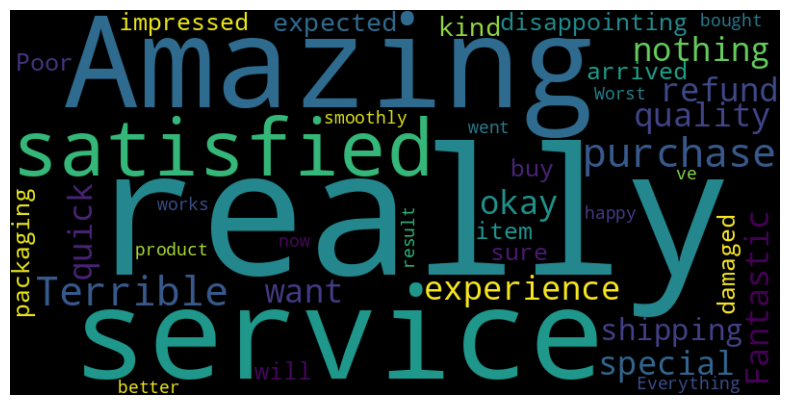

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 📊 Results and Conclusion
- **Sentiment Analysis**: Using TextBlob, the comments are classified into three categories: Positive, Negative, and Neutral.
- **TF-IDF Analysis**: The comments are converted into numerical vectors, allowing further analysis of key terms.
- **Word Cloud**: A word cloud is generated to visualize the most frequent words across all the comments.

## Possible Improvements:
- For more accurate sentiment analysis, other models such as **VADER** or transformer-based models could be used.
- If the dataset includes comments in Turkish, libraries like **Zemberek** or **TurkishSentiment** could be used for better language support.
- The stop words for the word cloud could be adapted to the Turkish language if necessary.
- A deeper analysis could be performed to explore the relationship between the sentiment scores and the words in the comments.
